In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./nba_scraped_data.csv')
df

,#,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,YEAR
0,2023-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Joel Embiid,PHI,27.0,34.1,34.6,11.6,21.7,53.5,1.1,...,88.2,2.7,9.1,11.8,6.0,1.1,2.0,3.9,40.2,2023-24
2,2,Luka Doncic,DAL,34.0,36.8,33.6,11.4,23.5,48.5,4.0,...,77.8,0.7,7.4,8.1,9.1,1.4,0.6,3.9,34.8,2023-24
3,3,Shai Gilgeous-Alexander,OKC,36.0,34.4,31.4,11.3,20.3,55.5,1.2,...,89.0,0.8,5.1,5.9,6.3,2.3,0.8,2.0,34.7,2023-24
4,4,Giannis Antetokounmpo,MIL,37.0,34.9,31.2,11.6,19.1,61.0,0.4,...,67.7,2.7,8.8,11.5,5.9,1.3,1.2,3.6,36.4,2023-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,255,John Konchar,MEM,30.0,16.0,3.1,1.1,3.0,36.3,0.6,...,81.8,1.0,2.8,3.8,1.3,0.7,0.7,0.4,7.2,2023-24
256,256,Jaxson Hayes,LAL,32.0,10.3,3.0,1.3,1.9,67.2,0.0,...,53.6,0.5,1.3,1.8,0.3,0.2,0.4,0.6,4.2,2023-24
257,257,Andre Jackson Jr.,MIL,32.0,10.5,2.5,0.9,1.9,50.0,0.4,...,85.7,0.8,1.0,1.8,1.0,0.3,0.1,0.5,4.2,2023-24
258,258,Cody Zeller,NOP,28.0,9.0,2.1,0.7,1.8,38.8,0.0,...,60.6,1.2,1.6,2.8,1.1,0.1,0.1,0.4,4.4,2023-24


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   #       260 non-null    object 
 1   PLAYER  259 non-null    object 
 2   TEAM    259 non-null    object 
 3   GP      259 non-null    float64
 4   MIN     259 non-null    float64
 5   PTS     259 non-null    float64
 6   FGM     259 non-null    float64
 7   FGA     259 non-null    float64
 8   FG%     259 non-null    float64
 9   3PM     259 non-null    float64
 10  3PA     259 non-null    float64
 11  3P%     259 non-null    float64
 12  FTM     259 non-null    float64
 13  FTA     259 non-null    float64
 14  FT%     259 non-null    float64
 15  OREB    259 non-null    float64
 16  DREB    259 non-null    float64
 17  REB     259 non-null    float64
 18  AST     259 non-null    float64
 19  STL     259 non-null    float64
 20  BLK     259 non-null    float64
 21  TOV     259 non-null    float64
 22  EF

# Data Cleaning

In [4]:
# Drop rows that have 'NaN' values and '#' column
df = df.dropna()
df = df.drop('#', axis=1)

In [5]:
# Create a rearranged list 
arrange_columns = ['YEAR', 'PLAYER', 'TEAM', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'EFF']

# Set dataframe to new columns
df = df[arrange_columns]

df.head()

,YEAR,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
1,2023-24,Joel Embiid,PHI,27.0,34.1,34.6,11.6,21.7,53.5,1.1,...,11.6,88.2,2.7,9.1,11.8,6.0,1.1,2.0,3.9,40.2
2,2023-24,Luka Doncic,DAL,34.0,36.8,33.6,11.4,23.5,48.5,4.0,...,8.7,77.8,0.7,7.4,8.1,9.1,1.4,0.6,3.9,34.8
3,2023-24,Shai Gilgeous-Alexander,OKC,36.0,34.4,31.4,11.3,20.3,55.5,1.2,...,8.6,89.0,0.8,5.1,5.9,6.3,2.3,0.8,2.0,34.7
4,2023-24,Giannis Antetokounmpo,MIL,37.0,34.9,31.2,11.6,19.1,61.0,0.4,...,11.2,67.7,2.7,8.8,11.5,5.9,1.3,1.2,3.6,36.4
5,2023-24,Kevin Durant,PHX,31.0,36.8,29.3,10.3,19.5,52.6,2.1,...,7.5,87.6,0.4,5.9,6.4,5.8,0.9,1.1,3.2,30.1


In [6]:
# Show the change
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259 entries, 1 to 259
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    259 non-null    object 
 1   PLAYER  259 non-null    object 
 2   TEAM    259 non-null    object 
 3   GP      259 non-null    float64
 4   MIN     259 non-null    float64
 5   PTS     259 non-null    float64
 6   FGM     259 non-null    float64
 7   FGA     259 non-null    float64
 8   FG%     259 non-null    float64
 9   3PM     259 non-null    float64
 10  3PA     259 non-null    float64
 11  3P%     259 non-null    float64
 12  FTM     259 non-null    float64
 13  FTA     259 non-null    float64
 14  FT%     259 non-null    float64
 15  OREB    259 non-null    float64
 16  DREB    259 non-null    float64
 17  REB     259 non-null    float64
 18  AST     259 non-null    float64
 19  STL     259 non-null    float64
 20  BLK     259 non-null    float64
 21  TOV     259 non-null    float64
 22  EF

# Visualization

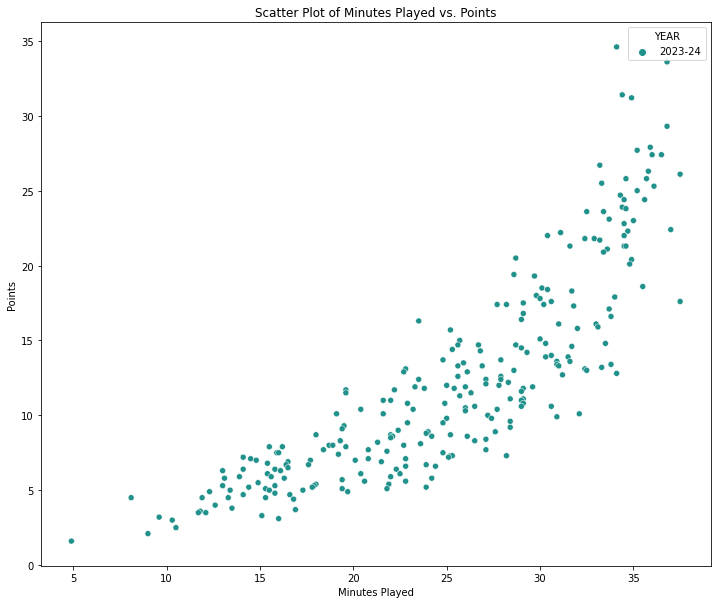

In [7]:
# Create a scatter plot on minutes vs points scored
plt.figure(figsize=(12, 10))
sns.scatterplot(x='MIN', y='PTS', data=df, hue='YEAR', palette='viridis')
plt.title('Scatter Plot of Minutes Played vs. Points')
plt.xlabel('Minutes Played')
plt.ylabel('Points')
plt.show()


In [8]:
# Find the top 10 players with the most assists the of the 2023-24 season
assists_df = df.loc[df['AST'] >=6].head(10)
assists_df.sort_values(by='AST', ascending=False, inplace=True)
assists_df

,YEAR,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
8,2023-24,Trae Young,ATL,35.0,36.5,27.4,8.5,19.9,42.4,3.3,...,8.4,85.7,0.5,2.5,3.0,10.9,1.5,0.2,4.3,25.9
15,2023-24,Nikola Jokic,DEN,39.0,33.3,25.5,9.9,17.2,57.5,1.1,...,5.8,82.2,2.8,8.9,11.7,9.3,1.2,0.9,2.8,37.5
2,2023-24,Luka Doncic,DAL,34.0,36.8,33.6,11.4,23.5,48.5,4.0,...,8.7,77.8,0.7,7.4,8.1,9.1,1.4,0.6,3.9,34.8
11,2023-24,Devin Booker,PHX,29.0,35.8,26.3,9.0,18.8,48.0,2.1,...,7.0,88.6,0.8,4.1,4.8,7.7,0.9,0.4,3.0,26.6
18,2023-24,LeBron James,LAL,36.0,34.3,24.7,9.2,17.6,52.1,2.1,...,5.7,73.2,0.9,6.3,7.2,7.6,1.4,0.6,3.3,28.3
17,2023-24,Damian Lillard,MIL,35.0,35.2,25.0,7.3,17.0,43.0,3.0,...,8.0,91.8,0.6,3.7,4.3,6.8,1.0,0.2,2.5,24.4
12,2023-24,Tyrese Maxey,PHI,36.0,37.5,26.1,8.9,19.8,45.1,3.1,...,5.8,87.1,0.6,3.2,3.7,6.6,1.0,0.6,1.6,24.7
14,2023-24,Jalen Brunson,NYK,38.0,35.7,25.8,9.1,19.3,46.9,2.8,...,5.8,83.3,0.6,3.2,3.8,6.4,1.0,0.2,2.3,23.6
3,2023-24,Shai Gilgeous-Alexander,OKC,36.0,34.4,31.4,11.3,20.3,55.5,1.2,...,8.6,89.0,0.8,5.1,5.9,6.3,2.3,0.8,2.0,34.7
1,2023-24,Joel Embiid,PHI,27.0,34.1,34.6,11.6,21.7,53.5,1.1,...,11.6,88.2,2.7,9.1,11.8,6.0,1.1,2.0,3.9,40.2


In [9]:
# Find the top 10 players with the most rebounds the of the 2023-24 season
rebounds_df = df.loc[df['REB'] >= 6].head(10)
rebounds_df .sort_values(by='REB', ascending=False, inplace=True)
rebounds_df 

,YEAR,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
16,2023-24,Anthony Davis,LAL,37.0,36.1,25.3,9.6,17.1,56.2,0.4,...,7.1,81.0,3.1,8.9,12.0,3.3,1.2,2.5,2.2,33.3
1,2023-24,Joel Embiid,PHI,27.0,34.1,34.6,11.6,21.7,53.5,1.1,...,11.6,88.2,2.7,9.1,11.8,6.0,1.1,2.0,3.9,40.2
15,2023-24,Nikola Jokic,DEN,39.0,33.3,25.5,9.9,17.2,57.5,1.1,...,5.8,82.2,2.8,8.9,11.7,9.3,1.2,0.9,2.8,37.5
4,2023-24,Giannis Antetokounmpo,MIL,37.0,34.9,31.2,11.6,19.1,61.0,0.4,...,11.2,67.7,2.7,8.8,11.5,5.9,1.3,1.2,3.6,36.4
20,2023-24,Julius Randle,NYK,38.0,35.6,24.4,8.7,18.4,47.4,1.5,...,7.0,77.7,2.0,7.2,9.2,4.8,0.6,0.3,3.3,24.7
9,2023-24,Jayson Tatum,BOS,35.0,36.0,27.4,9.2,19.3,47.9,3.2,...,7.1,81.4,0.9,7.4,8.3,4.4,1.0,0.5,2.8,27.5
2,2023-24,Luka Doncic,DAL,34.0,36.8,33.6,11.4,23.5,48.5,4.0,...,8.7,77.8,0.7,7.4,8.1,9.1,1.4,0.6,3.9,34.8
18,2023-24,LeBron James,LAL,36.0,34.3,24.7,9.2,17.6,52.1,2.1,...,5.7,73.2,0.9,6.3,7.2,7.6,1.4,0.6,3.3,28.3
5,2023-24,Kevin Durant,PHX,31.0,36.8,29.3,10.3,19.5,52.6,2.1,...,7.5,87.6,0.4,5.9,6.4,5.8,0.9,1.1,3.2,30.1
21,2023-24,Kawhi Leonard,LAC,34.0,34.4,23.9,8.9,17.2,52.1,2.3,...,4.3,87.7,1.1,4.9,6.0,3.5,1.7,0.9,1.6,25.7


In [10]:
# Find the top 10 scorers of the 2023-24 season
top_ten_df = df.loc[df['YEAR'] == '2023-24'].head(10)
top_ten_df.sort_values(by='PTS', ascending=False, inplace=True)
top_ten_df

,YEAR,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
1,2023-24,Joel Embiid,PHI,27.0,34.1,34.6,11.6,21.7,53.5,1.1,...,11.6,88.2,2.7,9.1,11.8,6.0,1.1,2.0,3.9,40.2
2,2023-24,Luka Doncic,DAL,34.0,36.8,33.6,11.4,23.5,48.5,4.0,...,8.7,77.8,0.7,7.4,8.1,9.1,1.4,0.6,3.9,34.8
3,2023-24,Shai Gilgeous-Alexander,OKC,36.0,34.4,31.4,11.3,20.3,55.5,1.2,...,8.6,89.0,0.8,5.1,5.9,6.3,2.3,0.8,2.0,34.7
4,2023-24,Giannis Antetokounmpo,MIL,37.0,34.9,31.2,11.6,19.1,61.0,0.4,...,11.2,67.7,2.7,8.8,11.5,5.9,1.3,1.2,3.6,36.4
5,2023-24,Kevin Durant,PHX,31.0,36.8,29.3,10.3,19.5,52.6,2.1,...,7.5,87.6,0.4,5.9,6.4,5.8,0.9,1.1,3.2,30.1
6,2023-24,Donovan Mitchell,CLE,28.0,35.9,27.9,9.6,21.1,45.7,3.1,...,6.2,87.4,1.1,4.5,5.5,5.7,1.9,0.5,2.8,26.4
7,2023-24,De'Aaron Fox,SAC,32.0,35.2,27.7,9.8,20.9,46.9,3.2,...,6.8,72.2,0.9,3.3,4.3,5.8,1.6,0.4,2.6,24.1
8,2023-24,Trae Young,ATL,35.0,36.5,27.4,8.5,19.9,42.4,3.3,...,8.4,85.7,0.5,2.5,3.0,10.9,1.5,0.2,4.3,25.9
9,2023-24,Jayson Tatum,BOS,35.0,36.0,27.4,9.2,19.3,47.9,3.2,...,7.1,81.4,0.9,7.4,8.3,4.4,1.0,0.5,2.8,27.5
10,2023-24,Stephen Curry,GSW,36.0,33.2,26.7,8.4,18.9,44.3,4.6,...,5.8,92.4,0.4,3.8,4.2,4.8,0.8,0.4,3.0,23.0


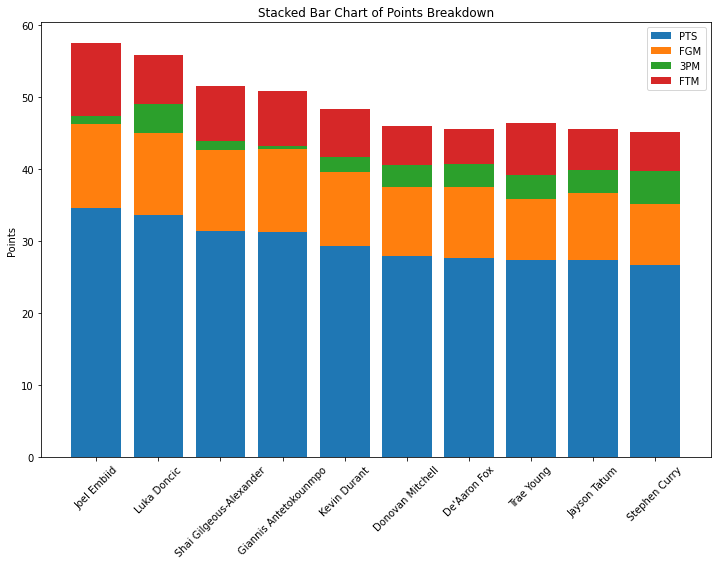

In [11]:
# Create stacked bar plot
fig, ax = plt.subplots(figsize=(12, 8))

# Stack the bars for different categories
bottom = None
for col in ['PTS', 'FGM', '3PM', 'FTM']:
    ax.bar(top_ten_df['PLAYER'], top_ten_df[col], label=col, bottom=bottom)
    if bottom is None:
        bottom = top_ten_df[col]
    else:
        bottom += top_ten_df[col]

ax.set_ylabel('Points')
ax.set_title('Stacked Bar Chart of Points Breakdown')
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [12]:
# Create a dataframe for players with the most rebounds
top_ten_rebounds = df.loc[df['REB'] > 4].head(10)
top_ten_rebounds = top_ten_rebounds[['PLAYER', 'YEAR', 'MIN', 'PTS', 'REB']]
top_ten_rebounds_sorted = top_ten_rebounds.sort_values(by='REB', ascending=False)

In [13]:
print(top_ten_rebounds_sorted)

                     PLAYER     YEAR   MIN   PTS   REB
1               Joel Embiid  2023-24  34.1  34.6  11.8
4     Giannis Antetokounmpo  2023-24  34.9  31.2  11.5
9              Jayson Tatum  2023-24  36.0  27.4   8.3
2               Luka Doncic  2023-24  36.8  33.6   8.1
5              Kevin Durant  2023-24  36.8  29.3   6.4
3   Shai Gilgeous-Alexander  2023-24  34.4  31.4   5.9
6          Donovan Mitchell  2023-24  35.9  27.9   5.5
11             Devin Booker  2023-24  35.8  26.3   4.8
7              De'Aaron Fox  2023-24  35.2  27.7   4.3
10            Stephen Curry  2023-24  33.2  26.7   4.2


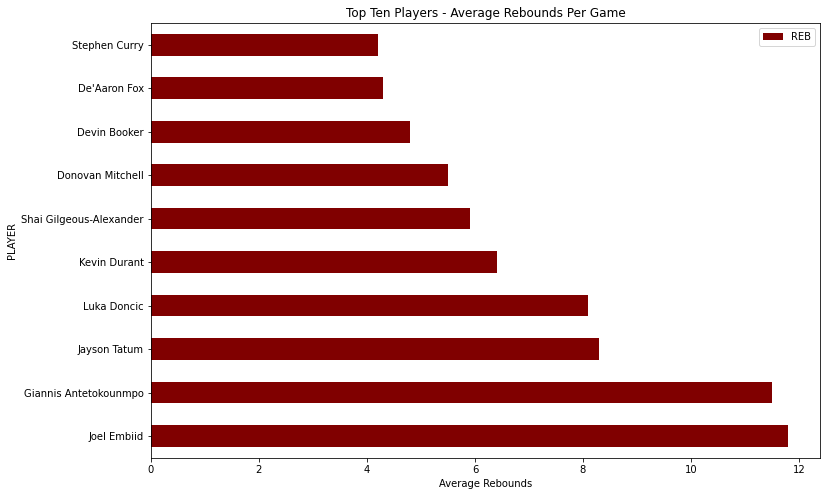

In [14]:
# Plotting bars in descending order
top_ten_rebounds_sorted.plot.barh(x='PLAYER', y='REB', color='maroon', figsize=(12, 8))

# Adding labels and title
plt.xlabel('Average Rebounds')
plt.title('Top Ten Players - Average Rebounds Per Game')

# Display the plot
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259 entries, 1 to 259
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    259 non-null    object 
 1   PLAYER  259 non-null    object 
 2   TEAM    259 non-null    object 
 3   GP      259 non-null    float64
 4   MIN     259 non-null    float64
 5   PTS     259 non-null    float64
 6   FGM     259 non-null    float64
 7   FGA     259 non-null    float64
 8   FG%     259 non-null    float64
 9   3PM     259 non-null    float64
 10  3PA     259 non-null    float64
 11  3P%     259 non-null    float64
 12  FTM     259 non-null    float64
 13  FTA     259 non-null    float64
 14  FT%     259 non-null    float64
 15  OREB    259 non-null    float64
 16  DREB    259 non-null    float64
 17  REB     259 non-null    float64
 18  AST     259 non-null    float64
 19  STL     259 non-null    float64
 20  BLK     259 non-null    float64
 21  TOV     259 non-null    float64
 22  EF

In [16]:
# Export cleaned data frame
file_path = 'nba_cleaned_data.csv'
df.to_csv(file_path, index=False)

# Machine Learning


In [17]:
df.columns

Index(['YEAR', 'PLAYER', 'TEAM', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'EFF'],
      dtype='object')

Text(0.5, 1.0, 'Correlation')

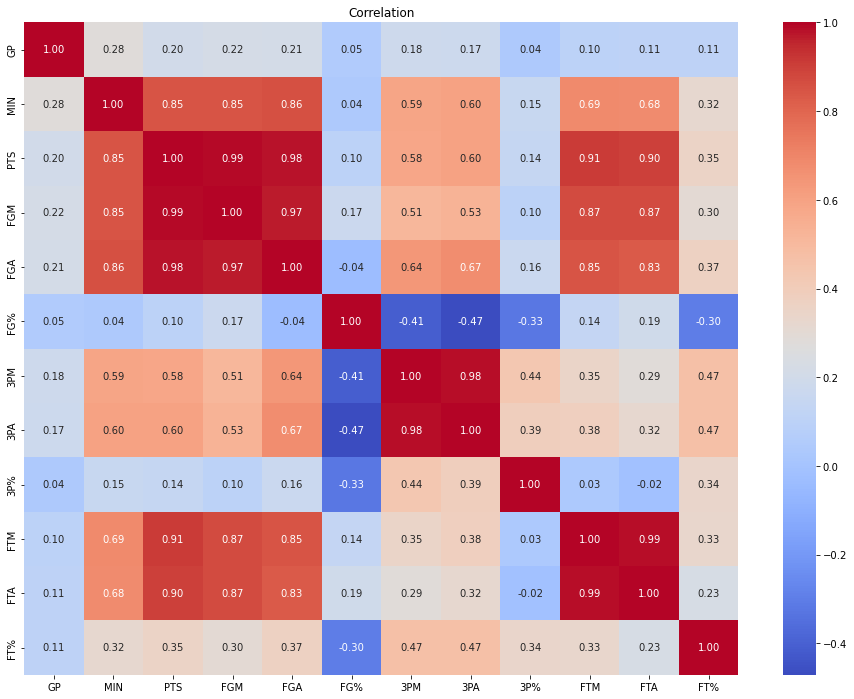

In [18]:
heatmap_columns = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%']

# Create heatmap dataframe
heatmap_data = df[heatmap_columns]

# Create heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation')

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


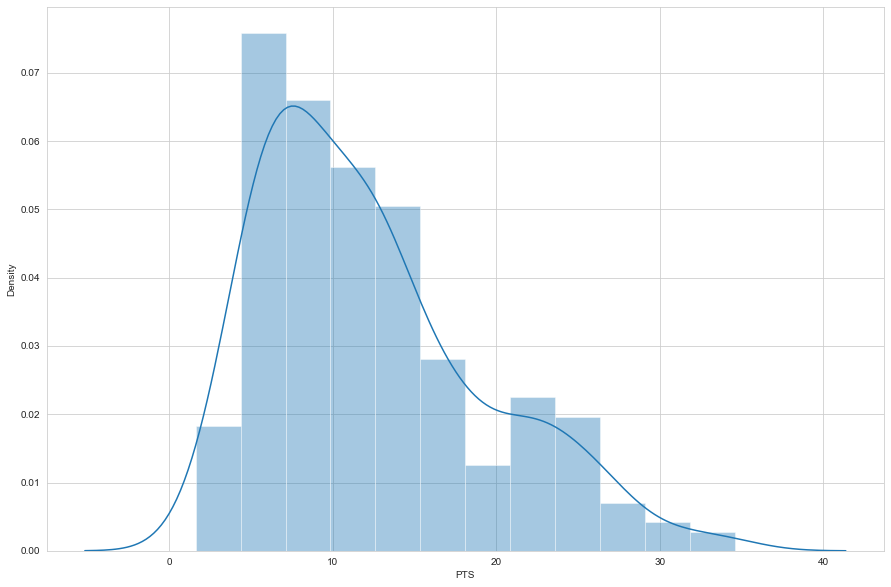

In [19]:
# Distribution of the values in the Points column
sns.set_style('whitegrid')
plt.figure(figsize=(15, 10))
sns.distplot(df['PTS'])
plt.show()